In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from generate_keypair import generate_key_pairs

In [2]:
def measure_key_generation_time(sizes):
    results = []
    for size in sizes:
        start_time = time.perf_counter()
        primes = generate_key_pairs(size)
        end_time = time.perf_counter()
        elapsed_time = (end_time - start_time) * 1000  # Convert to milliseconds
        results.append(elapsed_time)
    return results

In [4]:
sizes = [64, 128, 256, 512, 1024, 2048]
results = measure_key_generation_time(sizes)

In [5]:
x = np.array(sizes, dtype=np.float64)
y = np.array(results, dtype=np.float64)

In [24]:
quartic = x**4
quartic_constants = y / quartic
avg_quartic_constant = np.mean(quartic_constants)

cubic = x**3
cubic_constants = y / cubic
avg_cubic_constant = np.mean(cubic_constants)

cubic_log = cubic * np.log2(x)
cubic_log_constants = y / cubic_log
avg_cubic_log_constant = np.mean(cubic_log_constants)

quadratic = x**2
quadratic_constants = y / quadratic
avg_quadratic_constant = np.mean(quadratic_constants)

linear = x
linear_constants = y / linear
avg_linear_constant = np.mean(linear_constants)

print(results)

print("Average constant for O(n^4):", avg_quartic_constant)
print("Average constant for O(n^3):", avg_cubic_constant)
print("Average constant for O(n^3 log n):", avg_cubic_log_constant)
print("Average constant for O(n^2):", avg_quadratic_constant)
print("Average constant for O(n):", avg_linear_constant)


[4.682100028730929, 25.76200000476092, 53.09060006402433, 234.2210999922827, 31043.389200000092, 213340.86540003773]
Average constant for O(n^4): 7.18626906755435e-08
Average constant for O(n^3): 1.480035954141991e-05
Average constant for O(n^3 log n): 1.7450203770498989e-06
Average constant for O(n^2): 0.014148128057903109
Average constant for O(n): 22.570904313274315


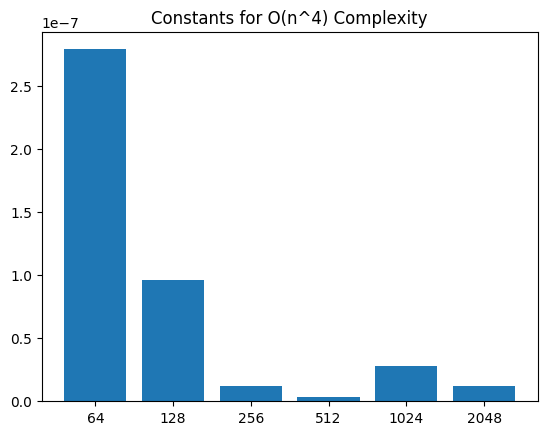

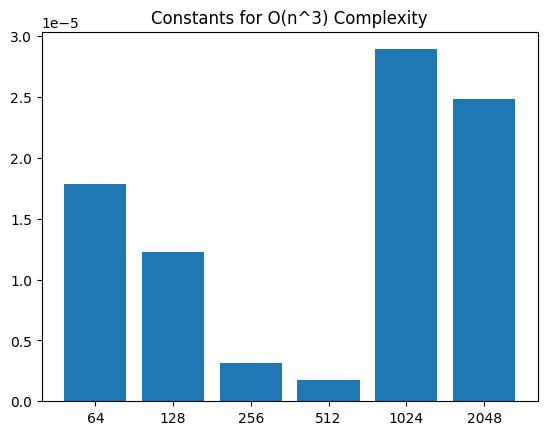

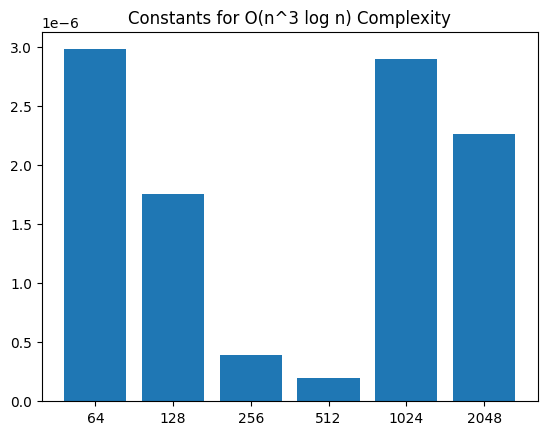

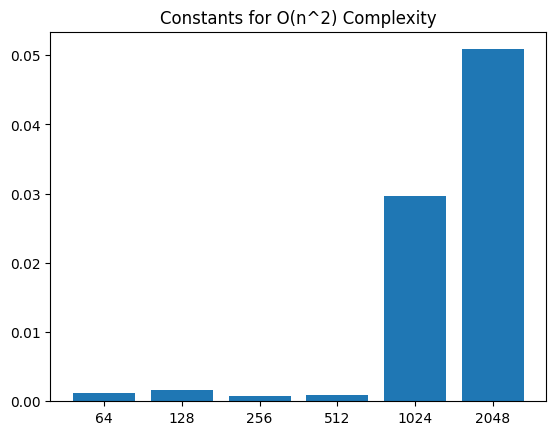

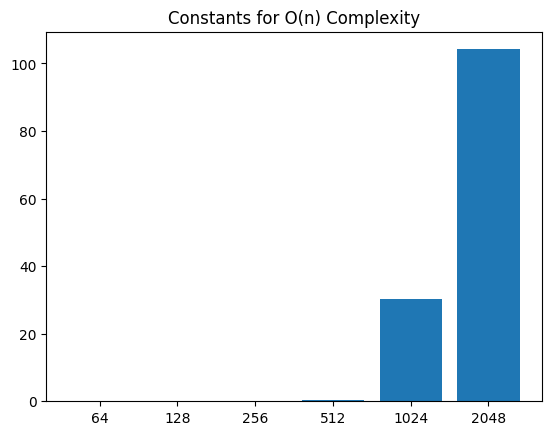

In [17]:
x_bins = [i for i in range(len(sizes))]
plt.bar(x_bins, quartic_constants, tick_label=sizes)
plt.title("Constants for O(n^4) Complexity")
plt.show()

plt.clf()
plt.bar(x_bins, cubic_constants, tick_label=sizes)
plt.title("Constants for O(n^3) Complexity")
plt.show()

plt.clf()
plt.bar(x_bins, cubic_log_constants, tick_label=sizes)
plt.title("Constants for O(n^3 log n) Complexity")
plt.show()

plt.clf()
plt.bar(x_bins, quadratic_constants, tick_label=sizes)
plt.title("Constants for O(n^2) Complexity")
plt.show()

plt.clf()
plt.bar(x_bins, linear_constants, tick_label=sizes)
plt.title("Constants for O(n) Complexity")
plt.show()

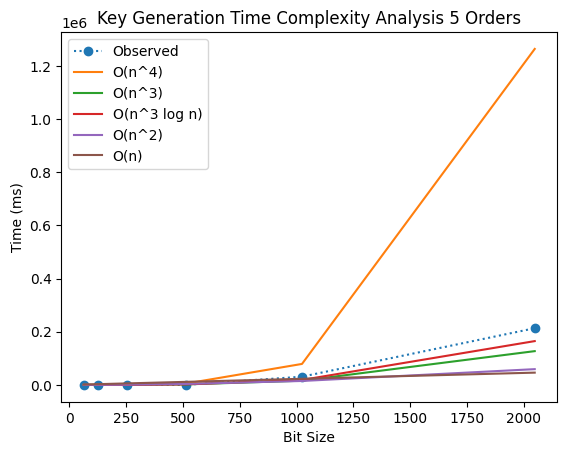

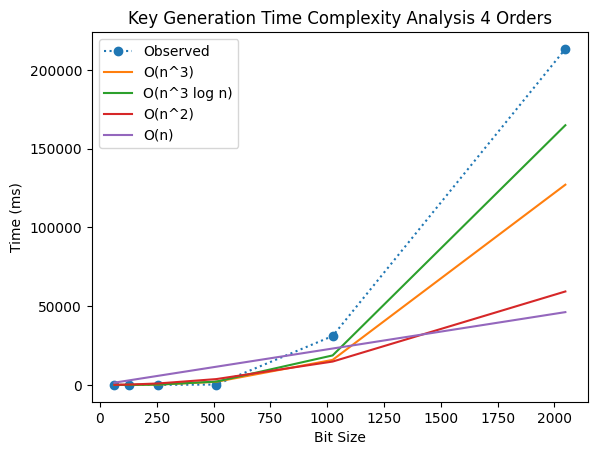

In [23]:
plt.clf()
plt.plot(x, y, label='Observed', linestyle=':', marker='o')
plt.title("Key Generation Time Complexity Analysis 5 Orders")
plt.plot(x, quartic * avg_quartic_constant, label='O(n^4)')
plt.plot(x, cubic * avg_cubic_constant, label='O(n^3)')
plt.plot(x, cubic_log * avg_cubic_log_constant, label='O(n^3 log n)')
plt.plot(x, quadratic * avg_quadratic_constant, label='O(n^2)')
plt.plot(x, linear * avg_linear_constant, label='O(n)')
plt.legend()
plt.xlabel('Bit Size')
plt.ylabel('Time (ms)')
plt.show()

plt.clf()
plt.plot(x, y, label='Observed', linestyle=':', marker='o')
plt.title("Key Generation Time Complexity Analysis 4 Orders")
plt.plot(x, cubic * avg_cubic_constant, label='O(n^3)')
plt.plot(x, cubic_log * avg_cubic_log_constant, label='O(n^3 log n)')
plt.plot(x, quadratic * avg_quadratic_constant, label='O(n^2)')
plt.plot(x, linear * avg_linear_constant, label='O(n)')
plt.legend()
plt.xlabel('Bit Size')
plt.ylabel('Time (ms)')
plt.show()